## Simple Linear Regression in Python

In [49]:
import pandas as pd
data = pd.read_csv('./Data/Test/1000_Companies.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [50]:
data = data.loc[:,['R&D Spend', 'Profit']]
data.head()

,R&D Spend,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


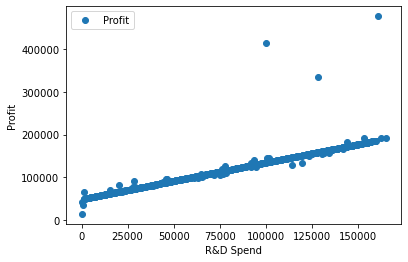

In [51]:
import matplotlib.pyplot as plt 
data.plot (x='R&D Spend', y= 'Profit', style='o')
plt.xlabel('R&D Spend') 
plt.ylabel( 'Profit' )
plt.show ()

Divide the data into independent and dependent variables

In [52]:
X = pd.DataFrame(data['R&D Spend'])
y = pd.DataFrame(data['Profit'])

Split the data into train and test sets

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Shape of the train and test sets

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 1)
(200, 1)
(800, 1)
(200, 1)


Train the algorithm

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Retriece the intercept

In [56]:
print(regressor.intercept_)

[48266.11133815]


Retrieve the slope

In [57]:
print(regressor.coef_)

[[0.87051181]]


Predicted value

In [58]:
y_pred = regressor.predict(X_test)
y_pred[:5, :]

array([[ 84721.40489674],
       [ 76108.56105346],
       [158822.85216934],
       [155256.36528578],
       [ 50532.0535783 ]])

Actual value

In [59]:
y_test.head()

,Profit
507,84808.91317
818,76356.55435
452,157529.61180
368,154029.58010
242,51256.61958


Evaluate the algorithm

In [60]:
from sklearn import metrics
import numpy as np
print('Mean absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute Error: 2551.9239092128087
Mean Squared Error: 396314166.0466723
Root Mean Squared Error: 19907.640896064815


## Multiple Linear Regression in Python

In [61]:
data2 = pd.read_csv('./Data/Test/1000_Companies.csv')

Set up the dependent and independent variables

In [65]:
X = pd.DataFrame(data2.iloc[:, :3])
y = pd.DataFrame(data2.iloc[:, -1])

Divide the data into train and test sets

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Have a glance at the shape of the train and test sets

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 3)
(200, 3)
(800, 1)
(200, 1)


Train the algorithm

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Having a look at the coefficients that the model has chosen

In [69]:
v = pd.DataFrame(regressor.coef_, index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attribute'])

Concatenating the DataFrames to compare

In [70]:
coeff_df = pd.concat([w, v], axis=1, join='inner')
coeff_df

,Attribute,Co-efficient
0,R&D Spend,0.620423
1,Administration,0.872687
2,Marketing Spend,0.057585


Comparing the predicted value to the acutal value

In [71]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

,Predicted
0,84798.520288
1,76285.556290
2,158040.641457
3,154515.513689
4,51005.649800
...,...
195,115044.752690
196,148577.777250
197,148601.868945
198,157594.085116


In [72]:
y_test

,Profit
507,84808.91317
818,76356.55435
452,157529.61180
368,154029.58010
242,51256.61958
...,...
430,114839.81770
874,148134.11530
550,148158.03550
608,157086.23460


Evaluate the algorithm

In [73]:
from sklearn import metrics
import numpy as np
print('Mean absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute Error: 2385.350486381564
Mean Squared Error: 195990536.09185708
Root Mean Squared Error: 13999.661999200447
